In [1]:
import asteroids

In [31]:
import numpy as np

def policy_fn(state: asteroids.State) -> asteroids.Action:
  pos = state.position
  goal_pos = state.goal_position
  rot = state.rotation

  x_to_goal = goal_pos[0] - pos[0]
  y_to_goal = goal_pos[1] - pos[1]

  angle_to_goal = np.arctan2(y_to_goal, x_to_goal)

  forward_unit_vec = state.forward()
  to_goal_unit_vec = np.stack([np.cos(angle_to_goal),
                               np.sin(angle_to_goal)], axis=-1)

  


  if angle_to_goal > 0:
    torque = -0.5
  else:
    torque = 0.5
  thrust = 1.
  return asteroids.Action(array=np.array([torque, thrust]))

# def policy_fn(state: asteroids.State) -> asteroids.Action:
#   .. Do stuff
#   return action

def policy_generator(state: asteroids.State) -> asteroids.Action:
  while True:
    state = yield policy_fn(state)

In [43]:
gen = sample_generator(0)

In [45]:
print(gen.send(None))
print(gen.send(0))
print(gen.send(1))

0
1
2


In [47]:
def sample_generator(num):
  while True:
    num = yield num
    num += 1

gen = sample_generator(0)
gen.send(None)

num = 0
for _ in range(4):
  num = gen.send(num)
  print(f'Number: {num}')

Number: 1
Number: 2
Number: 3
Number: 4


In [32]:
from typing import Generator
# def policy_fn(state: asteroids.State) -> asteroids.Action:
#   .. Do stuff
#   return action

def policy_generator(state: asteroids.State) -> Generator[asteroids.Action, asteroids.State, None]:
  while True:
    state = yield policy_fn(state)

state = asteroids.State()
iters = 100

policy_gen = policy_generator(state)
policy_gen.send(None)

actions = []
states = []

for _ in range(iters):
  states.append(state)
  action = policy_gen.send(state)
  actions.append(action)
  state = state.dynamics(action)

In [33]:
states[0].position

array([23.247652 ,  4.1125174], dtype=float32)

In [34]:
positions = np.array([s.position for s in states])
goal_positions = np.array([s.goal_position for s in states])

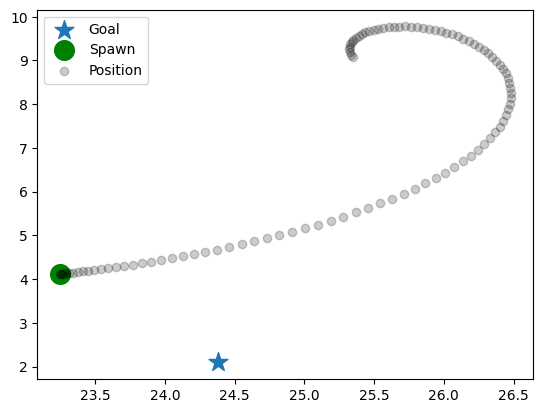

In [35]:
import matplotlib.pyplot as plt

plt.scatter(goal_positions[0][0], goal_positions[0][1], marker='*', s=200, label='Goal')
plt.scatter(positions[0, 0], positions[0, 1], c='g', s=200, label='Spawn')
plt.scatter(positions[:, 0], positions[:, 1], alpha=0.2, c='k', label='Position')
plt.legend()